# 3. Explotatory data analysis

## 3.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.font_manager
import data_functions
from data_functions import beautiful_graph
from data_functions import beautiful_lineplot

## 3.3 Reading data

In [2]:
# We are plotting features != location, so we can (and should) take those duplicates out for these plots.
cars = pd.read_csv('../data/clean_cars_id.csv').drop_duplicates(['id']).drop(['id'],axis=1).reset_index(drop=True)

In [4]:
# Changing Units for clarity
cars['km'] = cars['km']/1000
cars.columns=map(lambda x: x.replace('km','Mm'),cars.columns)
cars['price'] = cars['price']/1000

## 3.4 Data visualization

In [5]:
# Setting font parameters
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.serif'] = 'Roboto'
plt.rcParams['font.monospace'] = 'Roboto Mono'
plt.rcParams['font.size'] = 11

In [6]:
# General overview of the numerical dataset
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52888.0,5.909469,3.605461,1.000,4.00000,5.0000,7.00000,54.0
cv,52888.0,138.449213,59.583880,41.000,109.00000,127.0000,150.00000,720.0
Mm,52888.0,82.970911,112.565270,0.001,39.03825,72.1175,112.57175,16106.1
price,52888.0,21.520534,13.930202,0.500,13.90000,18.9800,25.90000,565.0
cmixto,52888.0,5.042151,1.285931,1.300,4.20000,4.8000,5.50000,21.3
area,52888.0,79132.288780,8327.157250,38000.000,74285.00000,79352.0000,83880.00000,115136.0


### 3.4.0 Age

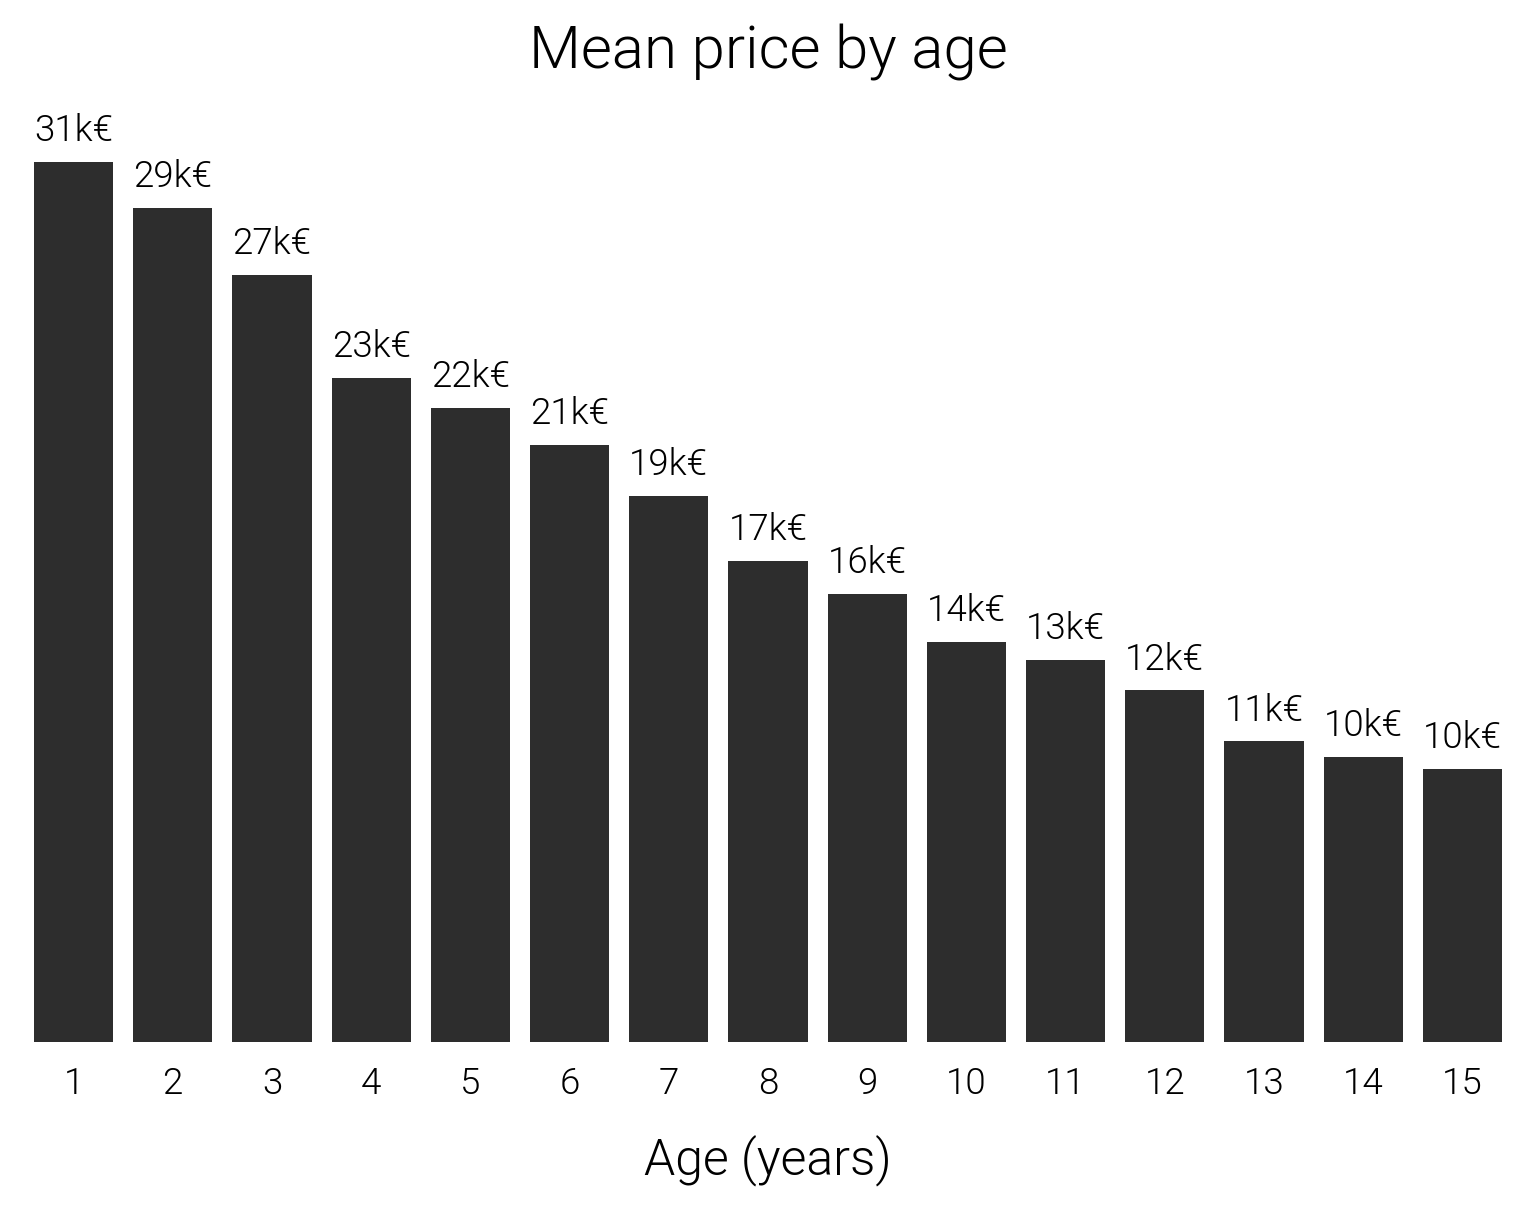

In [7]:
plt.figure(figsize=(8,5),dpi=1200/5)
plot_data = cars[cars['year']<16].copy()

result = plot_data.groupby(["year"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(x="year", y="price", data=plot_data, ci=0 ,color='#2d2d2d', order=result['year'])

beautiful_graph(ax=ax, title = 'Mean price by age', xtitle = 'Age (years)', ytitle = '',
                     format_ = '%.0fk€',name='price-age',angle=0)
plt.show()

### 3.4.1 Colors

In [8]:
# Translating colors to english
translate = { 'blanco': 'White', 'gris': 'Gray', 'negro': 'Black', 'azul': 'Blue', 'rojo': 'Red',
'otros': 'others', 'plateado': 'Silver', 'marron': 'Brown', 'beige': 'Beige', 'naranja': 'Orange', 'verde': 'Green', 'amarillo': 'Yellow'}

for color_es, color in zip(translate.keys(),translate.values()):
    cars['color'] = np.where(cars['color']==color_es,color,cars['color'])

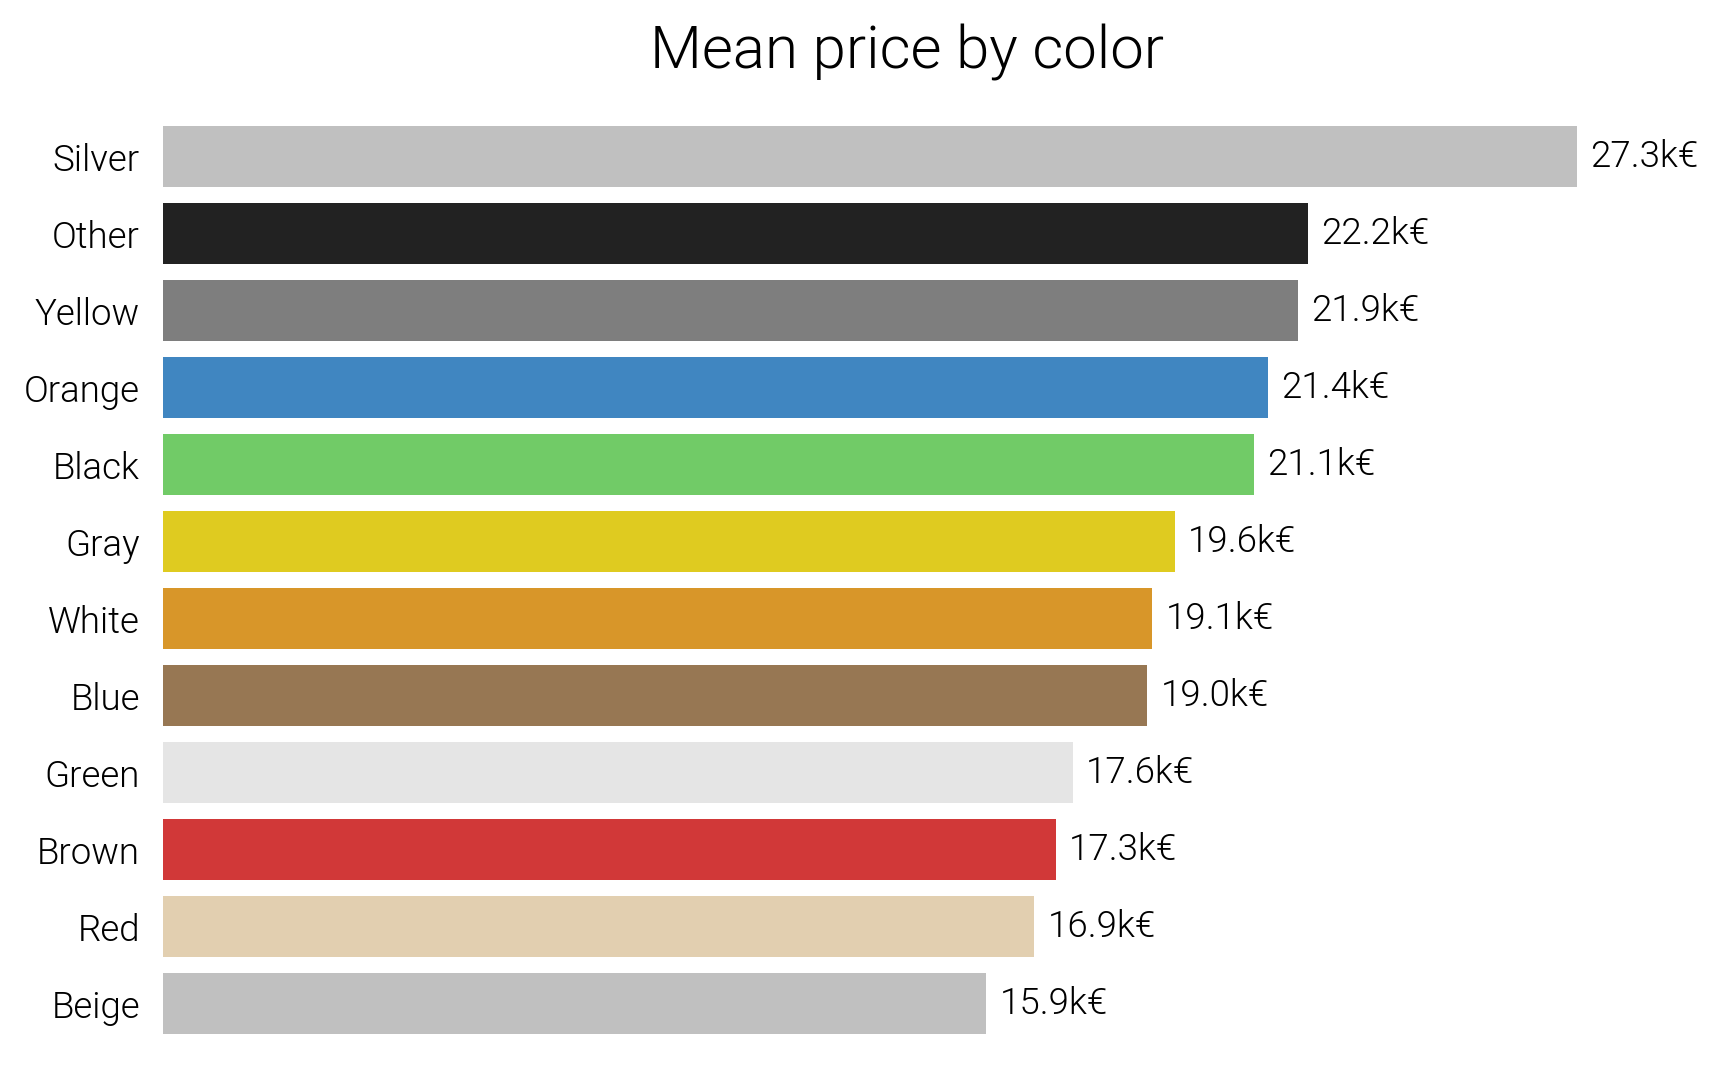

In [9]:
plt.figure(figsize=(8,5),dpi=1200/5)
plot_data = cars[cars['color']!='others'].copy()
result = plot_data.groupby(["color"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(y="color", x="price", data=cars[cars['color']!='other'], ci=0,
                 palette=['silver','#222222', '#7e7e7e', '#2a88d6', '#64dc56','#ffe400',
                          '#f59d0c','#a37847','#e5e5e5','#ea1f1f','#ebd1a7'], order = result['color'], orient='h')

beautiful_graph(ax=ax, title = 'Mean price by color', ytitle = '', xtitle = '',
                     format_ = '%.1fk€',name='price-color', label='left')
plt.show()

### 3.4.2 Brands

In [10]:
# Capitalizing brands
cars['brand'] = cars['brand'].map(lambda x: x.capitalize())

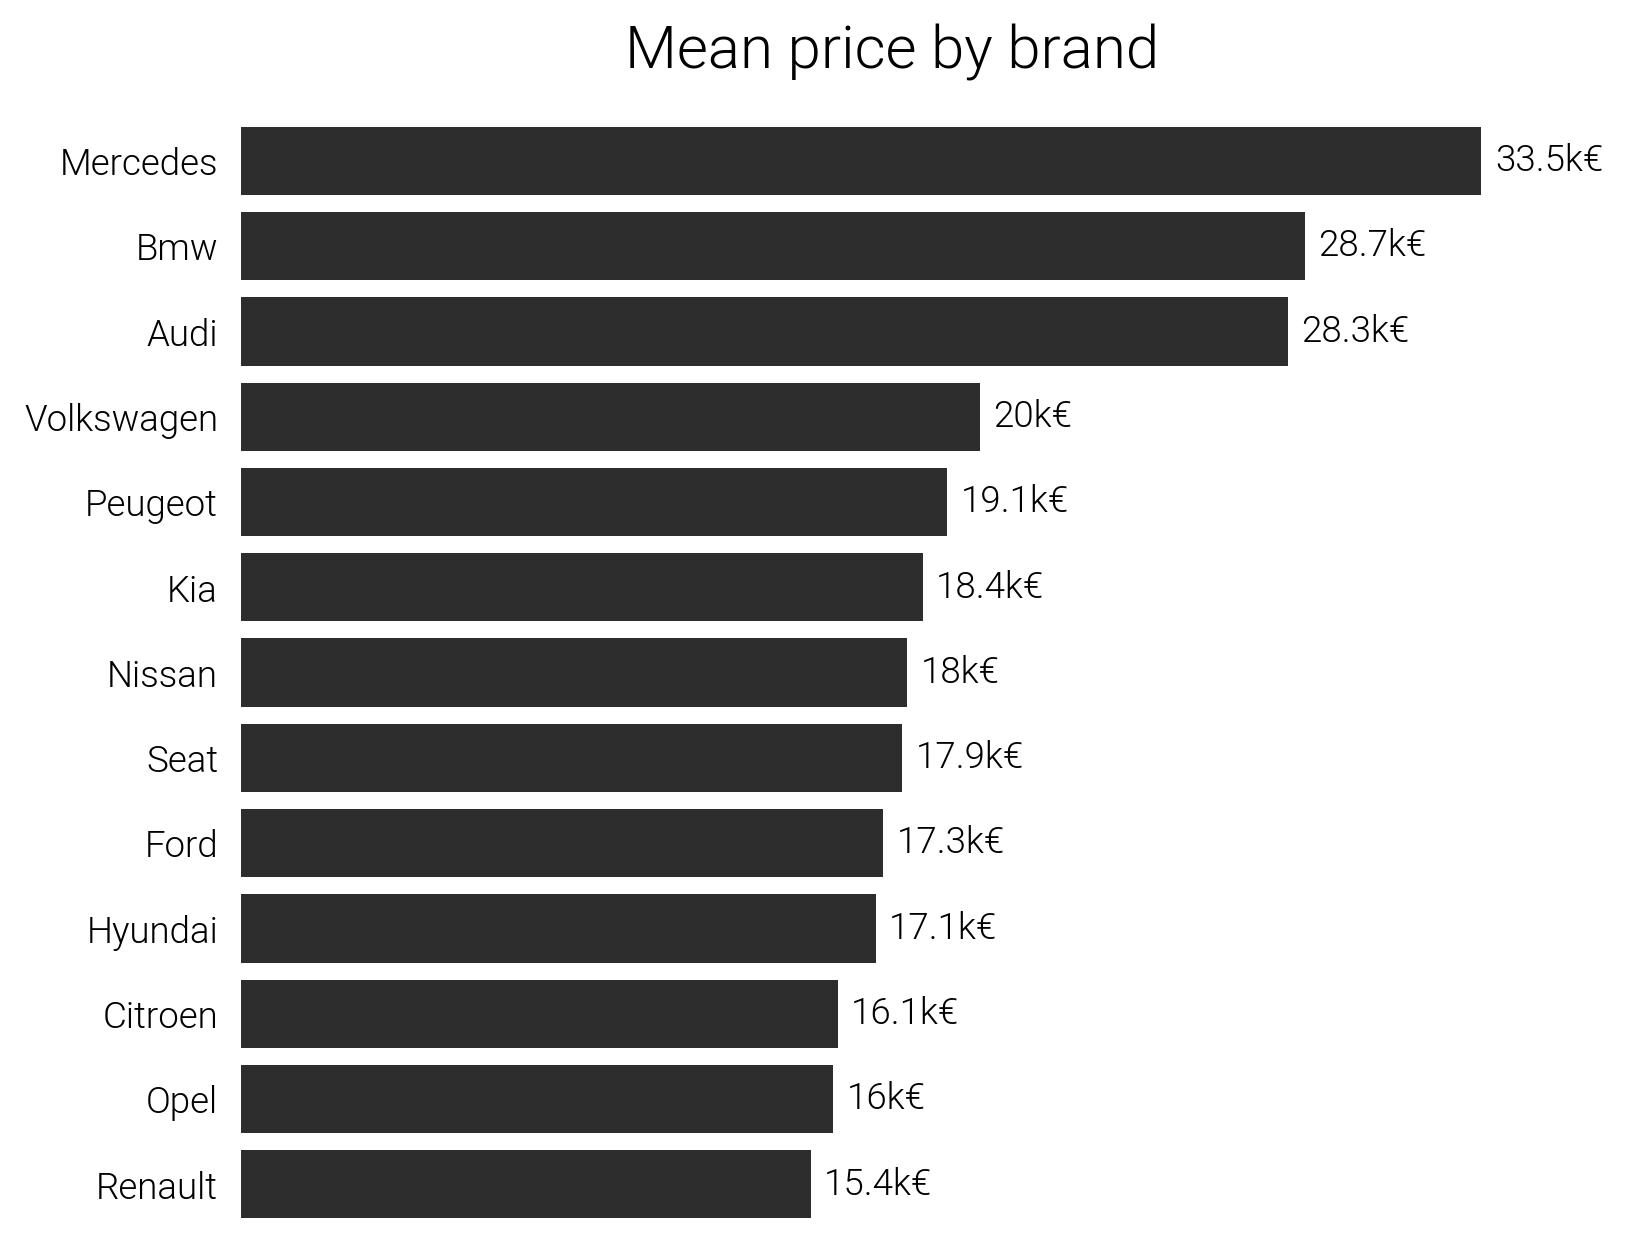

In [11]:
plt.figure(figsize=(7,6),dpi=1200/5)
plot_data = cars[cars['brand'].isin(cars.brand.value_counts()[0:13].index)].copy()

result = plot_data.groupby(["brand"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(y="brand", x="price", data=plot_data, ci=0,color='#2d2d2d', order=result['brand'], orient ='h')
plt.xticks([])
beautiful_graph(ax=ax, title = 'Mean price by brand', ytitle = '', xtitle = '',
                     format_ = '%.3gk€',name='price-brand',angle=0,label='left')

### 3.4.3 Brands through time
Do all brands lose their value at the same rate? Let's have a look at the data!

In [12]:
common_brands = cars.brand.value_counts()[0:5].index
plot_data = cars[cars['brand'].isin(common_brands)].copy()

In [13]:
brands_evo = {}
for brand in common_brands:
    brand_evo = pd.DataFrame(columns=['year','mean_price'])
    for year in range(1,10+1):
        brand_evo.loc[year-1,:] = year,100*plot_data[(plot_data['brand']==brand)&(plot_data['year']==year)].price.mean()/plot_data[(plot_data['brand']==brand)&(plot_data['year']==1)].price.mean()
    brands_evo[brand] = brand_evo
colors = ['#e60049',"#0bb4ff","#36d6a6","#e6d800","#9b19f5"]
    
general_evo = pd.DataFrame(columns=['year','mean_price'])
for year in range(1,10+1):
        general_evo.loc[year-1,:] = year,100*np.mean([brands_evo[brand][brands_evo[brand]['year']==year]['mean_price'] for brand in common_brands])/np.mean([brands_evo[brand][brands_evo[brand]['year']==1]['mean_price'] for brand in common_brands])


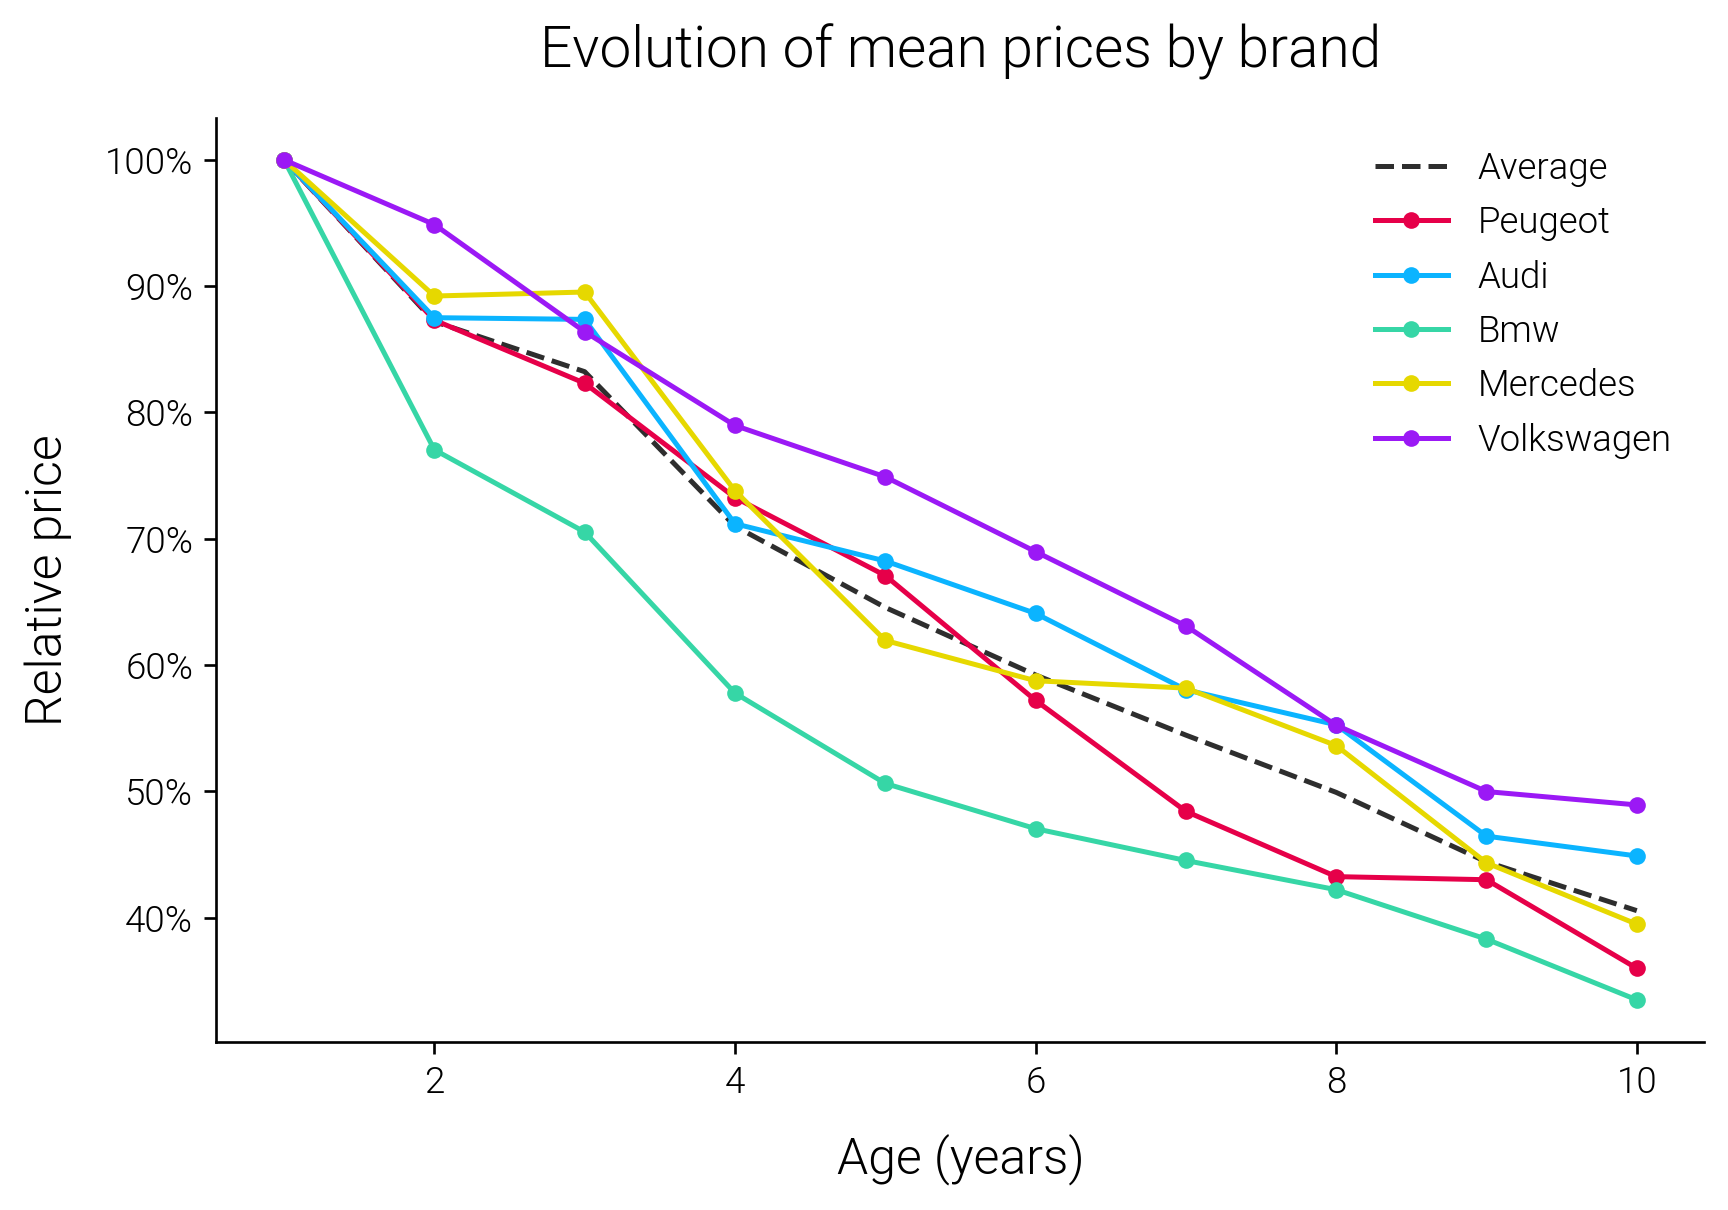

In [14]:
plt.figure(figsize=(8,5),dpi=1200/5)

ax = sns.lineplot(data=general_evo, x='year',y='mean_price', color = '#2e2e2e', label = 'Average')
ax.lines[0].set_linestyle("--")
for i,brand in enumerate(common_brands):
    ax = sns.lineplot(data=brands_evo[brand], x='year',y='mean_price', color= colors[i], marker = "o", markeredgewidth=0, markersize=5, label = brand)

    
beautiful_lineplot(ax=ax, title = 'Evolution of mean prices by brand', xtitle = 'Age (years)', ytitle = 'Relative price',format_= '{x:.0f}%',name='price-brand-age')
plt.show()

### 3.4.4 Fuel type

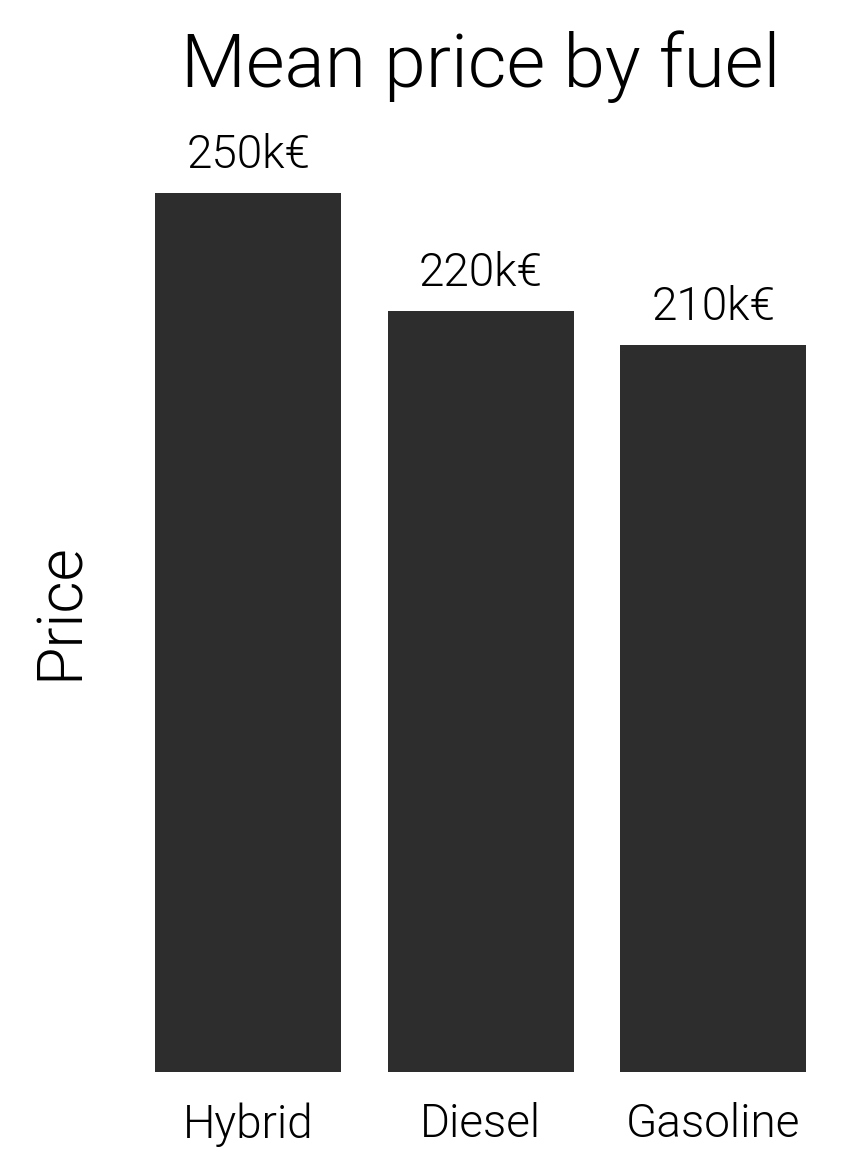

In [16]:
plt.figure(figsize=(3,4),dpi=1200/4)
plot_data = cars.copy()

result = plot_data.groupby(["fuel"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(x="fuel", y="price", data=plot_data, ci=0,color='#2d2d2d', order=result['fuel'])

beautiful_graph(ax=ax, title = 'Mean price by fuel', xtitle = '', ytitle = 'Price',
                     format_ = '%.f0k€',name='price-fuel',angle=0)

### 3.4.5 CV

In [17]:
cv_bin,order = data_functions.binning(cars[cars['cv']>=50]['cv'].reset_index(drop=True),bins=6,threshold=250,decimals=None)

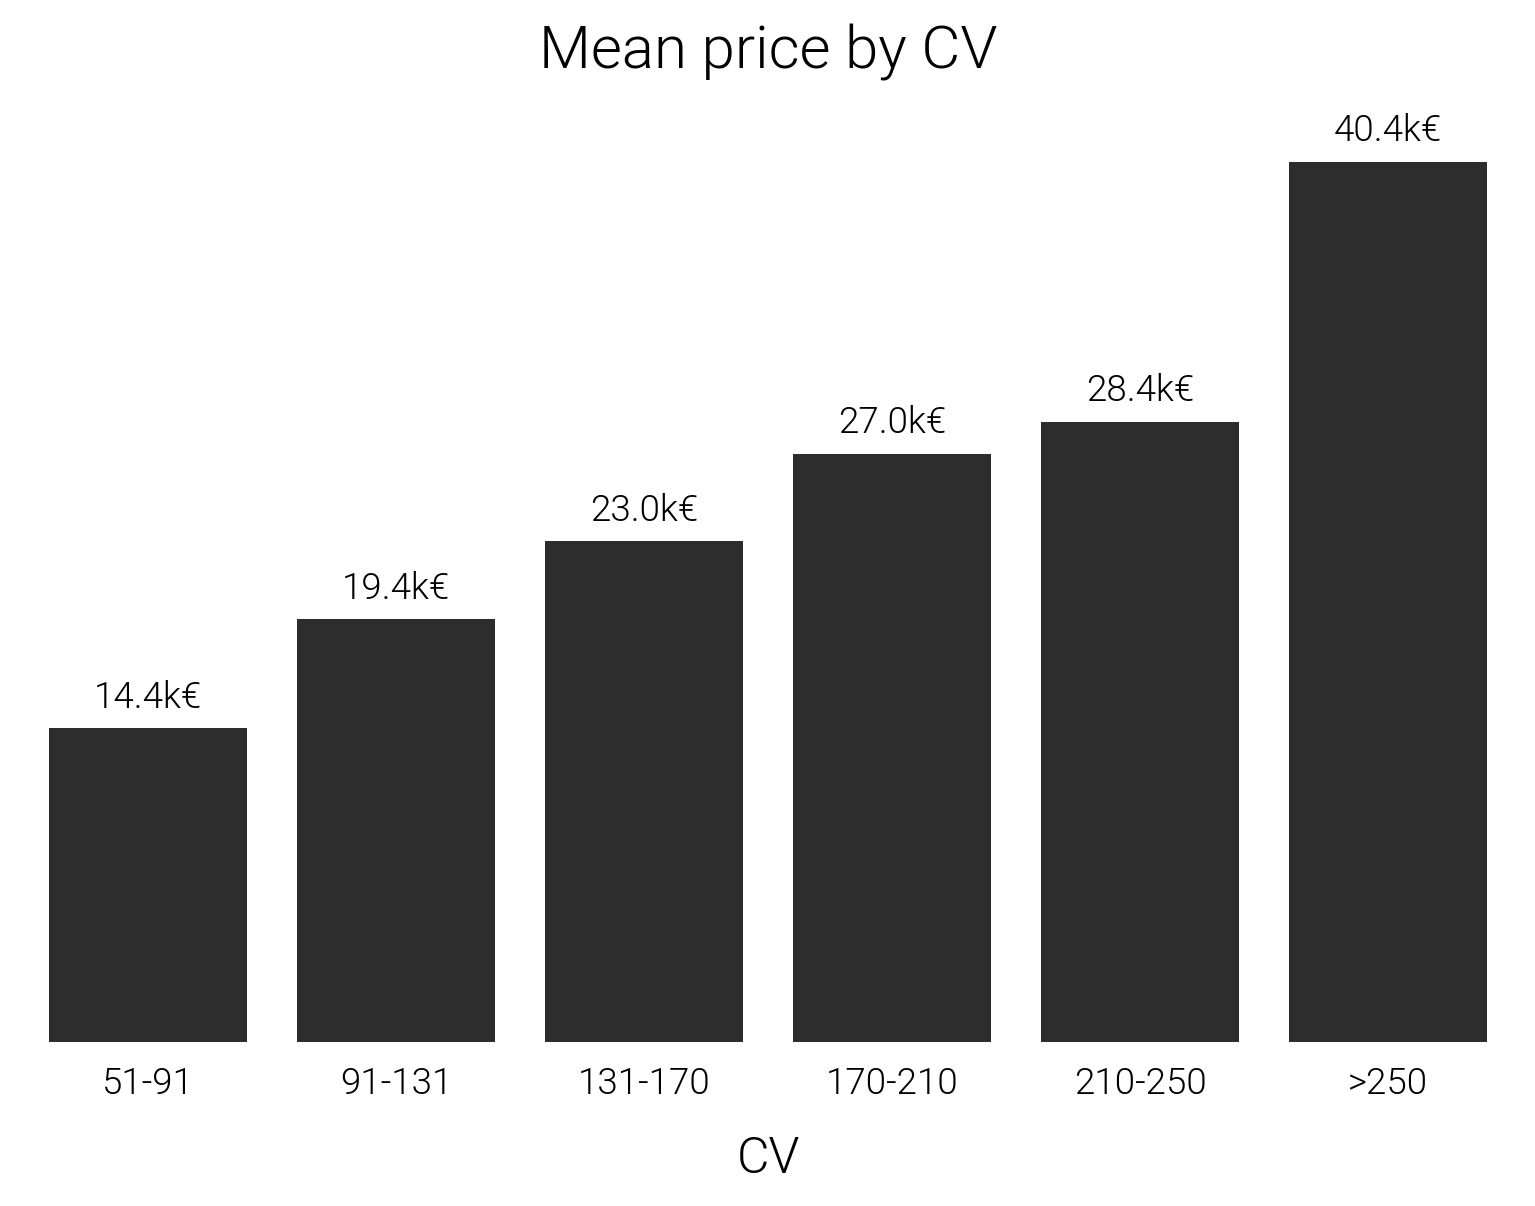

In [20]:
plt.figure(figsize=(8,5),dpi=1200/5)
plot_data = cars[cars['cv']>=50].copy()
plot_data['cv_bin'] = cv_bin

ax = sns.barplot(x="cv_bin", y="price", data=plot_data, ci=0,color='#2d2d2d', order=order)

beautiful_graph(ax=ax, title = 'Mean price by CV', xtitle = 'CV', ytitle = '',
                     format_ = '%.1fk€',name='price-cv',angle=0)



### 3.4.6 Location

In [ ]:
# This was done on Tableau

In [ ]:
"""import shutil
import matplotlib

shutil.rmtree(matplotlib.get_cachedir())
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')"""